In [1]:
'''
    RQ1: Relationship between impressions and medications/interventions
        What are the top treatments used for different conditions/problems?
        1Any interesting or counter intuitive observations?
'''


#importing what we need
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import textwrap

In [2]:
#get innermost keys

def inner_keys(d):
    ans = []
    for k, dictionary in d.items():
        for inner_key, freq in dictionary.items():
            ans.append(inner_key)
    return ans

In [3]:
data = pd.read_excel('COMBINED FINAL RAA Data, 2017-2020.xlsx')

data.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Priority,CallType,ChiefComplaint,Impression,Vitals,Procedures,Medications,Medic Notes,Narrative,Outcome
0,0,0,0,2020_2,1,Breathing Problem,{PAIN TO THE LEFT SIDE OF MY BODY}{SOB},{Pain - Chronic (G89.2)}{Hypertension (I10)}{R...,{2020-01-01T03:30:01: Pulse-96 Resp-16 BP-194/...,{2020-01-01T03:32:04: CV - ECG - 4 Lead Monito...,NaN,Arrived on scene to be welcomed inside the fr...,SUBJECTIVE: Called for a reported Breathing Pr...,"Patient Treated, Transported by this EMS Unit"
1,1,1,1,2020_3,1,Breathing Problem,"{Shortness of breath, nausea, vomiting, dizzin...",{Abuse of Alcohol - Intoxication (F10.92)}{Res...,{2020-01-01T02:28:17: Pulse-98 Resp-24 BP-109/...,{2020-01-01T02:44:10: CV - ECG - 4 Lead Monito...,NaN,Arrived to find a 29 y/o w/f sitting on her c...,SUBJECTIVE: Called for a reported Breathing Pr...,"Patient Treated, Transported by this EMS Unit"


In [4]:
imp_dict = pd.read_excel('Complied list of Impressions.xlsx', sheet_name='Grouped Data').set_index('ICD-10-CM').T.to_dict('list')

temp = pd.read_excel('Complied list of Procedures.xlsx', sheet_name='Grouped Data')
temp['Snomed'] = temp['Snomed'].astype(str)
pro_dict = temp.set_index('Snomed').T.to_dict('list')

temp = pd.read_excel('Complied list of ODEMSA Medications.xlsx', sheet_name='Grouped Data')
temp['RxCui'] = temp['RxCui'].astype(str)
med_dict =  temp.set_index('RxCui').T.to_dict('list')

med_dict

{'828527': ['10 ML calcium chloride 10 % Prefilled Syringe', nan, nan, nan],
 '161': ['Acetaminophen (Tylenol)', nan, nan, nan],
 '296': ['Adenosine (Adenocard)', nan, nan, nan],
 '435': ['Albuterol (Proventil)', 'Albuterol', nan, nan],
 '214199': ['Albuterol 5mg / Ipratropium 0.5mg (DuoNeb)',
  'Albuterol/Ipratropium (DuoNeb)',
  'DuoNeb',
  nan],
 '8410': ['Alteplase (Activase)', nan, nan, nan],
 '703': ['Amiodarone (Cordarone)',
  'Amiodarone',
  'Amiodarone (Bolus)',
  'Amiodarone (Drip)'],
 'T195': ['Antibiotics', nan, nan, nan],
 '1191': ['Aspirin (ASA)', 'Aspirin', nan, nan],
 '1223': ['Atropine', nan, nan, nan],
 '153971': ['Atropine Sulfate', nan, nan, nan],
 '205489': ['Bumetanide (Bumex)', 'Bumex 1 MG Oral Tablet', nan, nan],
 '1901': ['Calcium Chloride', nan, nan, nan],
 '197435': ['Calcium Gluconate 100 MG/ML Injectable Solution', nan, nan, nan],
 '687707': ['CYANOKIT 5g', nan, nan, nan],
 '575233': ['Dexamethasone (Decadron)',
  'Dexamethasone 0.75 MG (Decadron)',
  nan,


In [5]:
#read in grouped list

temp_imps = pd.read_excel('GROUPED Complied list of Impressions.xlsx').set_index(['Grouping'])
temp_imps['ICD-10-CM'] = temp_imps['ICD-10-CM'].astype(str)
grouped_imps = {}
for group, row in temp_imps.iterrows():
    icd = row['ICD-10-CM']
    grouped_imps[icd] = group 
    
temp_pros = pd.read_excel('GROUPED list of Procedures.xlsx').set_index(['Grouping'])
temp_pros['Snomed'] = temp_pros['Snomed'].astype(str)
grouped_pros = {}
for group, row in temp_pros.iterrows():
    sno = row['Snomed']
    grouped_pros[sno] = group 
    
grouped_pros


{'404996007': 'Access Airway',
 '232707004': 'Clear Airway',
 '23690002': 'Clear Airway',
 '232708009': 'Clear Airway',
 '230040009': 'Clear Airway',
 '232664002': 'Open/Position Airway',
 '51717002': 'ETCO2 Capnography',
 '425543005': 'ETCO2 Capnography',
 '19821003': 'ETCO2 Capnography',
 '284029005': 'ETCO2 Capnography',
 '104690002': 'Glucose Check',
 '302789003': 'Glucose Check',
 '406164000': 'Restraint Applied',
 '386423001': 'Restraint Applied',
 '241741007': 'Patient Cooling/Warming',
 '241740008': 'Patient Cooling/Warming',
 '421335007': 'Patient Cooling/Warming',
 '229585002': 'Patient Cooling/Warming',
 '398074008': 'Patient Cooling/Warming',
 '431774007': 'Patient Cooling/Warming',
 '431949004': 'Patient Cooling/Warming',
 '429283006': 'CPR',
 '441893003': 'CPR',
 '89666000': 'CPR',
 '425519007': 'CPR Discontinued',
 '18590009': 'Cardiac Pacing',
 '250980009': 'Cardioversion',
 '426220008': 'Defibrillation',
 '233169004': 'Defibrillation',
 '268400002': 'ECG',
 '428803005'

In [6]:
# Frequency of the medications/interventions prescribed for specific types of impressions, and their correspondings impressions
# corresponding impressions

#define all impressions to look at  #expand to Top 20
impressions_dict = {
    'R41.82':'Altered Mental Status',
    'R53.1':'Weakness',
    'I20.9':'Chest Pain - Cardiac',
    'J80':'Respiratory Distress - Acute Onset',
    'R07.89':'Pain - Chest Pain (non-cardiac)',
    'F11':'Abuse of Narcotic',
    'G89.1':'Pain - Not Elsewhere Mentioned Sudden Onset',
    'R53.81':'Malaise - Sick Person',
    'J44.1':'Respiratory - COPD Exacerbation',
    'J45.901':'Respiratory - Asthma Exacerbation',
    'G40.909':'Seizure', 
    'J98.9':'Respiratory Disorder Unspecified',
    'F41.9':'Anxiety disorder',
    'R10.84':'Pain - Abdominal Generalized',
    'I20.0':'Chest Pain - Angina',
    'Z00':'General - Examination no complaint (none)',
    'R55':'Syncopal Episode',
    'R11':'Nausea and vomiting',
    'I46.9':'Cardiac Arrest',
    'E13.64':'Hypoglycemia - Diabetic'
}



freq_impressions = {}
freq_procedures = {}
freq_medications = {}

for icd, impression in impressions_dict.items():
    #select all rows with that impression
    has_impression = data['Impression'].str.contains(icd, regex=False, na=False)
    rows = data[has_impression]
    #print(rows)
    
    #initialize the impression
    freq_impressions[impression] = {}
    freq_procedures[impression] = {}
    freq_medications[impression] = {}
    
    #frequency of other impressions
    impressions = rows['Impression'].str.split('}{')
    #print(impressions)
    for _, row in impressions.iteritems():
        try:
            for imp in row:
                start = imp.rfind('(') + 1
                end = imp.rfind(')')
                imp_id = imp[start:end]
                if not imp_id == icd: 
                    if imp_dict[imp_id][0] not in freq_impressions[impression]: freq_impressions[impression][imp_dict[imp_id][0]] = 0
                    freq_impressions[impression][imp_dict[imp_id][0]] += 1
        except TypeError:
            pass #skip if nan
    
    #frequency of other procedures
    procedures = rows['Procedures'].str.split('}{')
    for _, row in procedures.iteritems():
        try:
            for pro in row:
                start = pro.rfind('(') + 1
                end = pro.rfind(')')
                pro_id = pro[start:end]
                #print(pro_id)
                if pro_id != '0' and grouped_pros[pro_id] != 'Filter Out':
                    if grouped_pros[pro_id] not in freq_procedures[impression]: freq_procedures[impression][grouped_pros[pro_id]] = 0
                    freq_procedures[impression][grouped_pros[pro_id]] += 1
        except TypeError:
            pass #skip if nan

    
    
    #frequency of other medications
    freq_med = {}
    medications = rows['Medications'].str.split('}{')
    #print(impressions)
    for _, row in medications.iteritems():
        try:
            for med in row:
                #print(med)
                start = med.rfind('(') + 1
                end = med.rfind(')')
                med_id = med[start:end] 
                if med_dict[med_id][0] not in freq_medications[impression]: freq_medications[impression][med_dict[med_id][0]] = 0
                freq_medications[impression][med_dict[med_id][0]] += 1
        except TypeError:
            pass #skip if nan
        except KeyError as e:
            print(e, med)


In [7]:
freq_impressions

{'Altered Mental Status': {'Abuse of Alcohol - Intoxication': 218,
  'Nausea and vomiting': 40,
  'Abuse of Narcotic': 889,
  'Seizure': 694,
  'Dehydration': 28,
  'Hyperglycemia - Diabetic': 131,
  'Respiratory Distress - Acute Onset': 112,
  'Constipation': 5,
  'Pain - Not Elsewhere Mentioned Sudden Onset': 51,
  'Injury - Head': 176,
  'Hypertension': 26,
  'Injury - Concussion with L.O.C.': 32,
  'Syncopal Episode': 118,
  'Hypotension': 131,
  'Hypoglycemia - Diabetic': 489,
  'Anxiety disorder': 32,
  'Environmental - Poisoning or drug ingestion - Other': 146,
  'Respiratory Failure': 107,
  'Neuro - Stroke/CVA': 171,
  'Malaise - Sick Person': 123,
  'Behavioral - Strange and inexplicable behavior': 111,
  'Behavioral - Violent behavior': 39,
  'Environment - Hypothermia': 36,
  'Weakness': 330,
  'Abuse of Alcohol - Withdrawal': 13,
  'Respiratory Disorder Unspecified': 74,
  'General - Examination no complaint (none)': 74,
  'Injury - Abdomen': 9,
  'Cardiac Arrest': 63,
  '

In [8]:
#convert to table

#columns: x -> Top 10 Impressions rows: y -> Top 20 Corresponding Impressions
freq_impressions_df = pd.DataFrame(0, index=list(set(inner_keys(freq_impressions))),columns=freq_impressions.keys())

for impression, dictionary in freq_impressions.items():
    for corresp_imp, freq in dictionary.items():
        freq_impressions_df.at[corresp_imp, impression] += freq

freq_impressions_df

#convert table to frequencies
# total = ct_freqccs_df.to_numpy().sum()

# ct_freqccs_df = ct_freqccs_df.div(total)

,Altered Mental Status,Weakness,Chest Pain - Cardiac,Respiratory Distress - Acute Onset,Pain - Chest Pain (non-cardiac),Abuse of Narcotic,Pain - Not Elsewhere Mentioned Sudden Onset,Malaise - Sick Person,Respiratory - COPD Exacerbation,Respiratory - Asthma Exacerbation,Seizure,Respiratory Disorder Unspecified,Anxiety disorder,Pain - Abdominal Generalized,Chest Pain - Angina,General - Examination no complaint (none),Syncopal Episode,Nausea and vomiting,Cardiac Arrest,Hypoglycemia - Diabetic
Foreign Body Genitourinary Tract,0,1,1,0,2,0,1,1,1,0,0,0,0,4,0,0,0,0,0,0
Chest Pain - STEMI of Anterior Wall,4,8,27,5,2,2,2,3,1,0,1,0,1,0,4,2,1,5,1,0
Shock - Hypovolemic,12,9,0,2,0,0,1,2,1,0,0,0,2,0,0,0,9,0,6,1
Metabolic Disorder - Other,2,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0
Pain - Extremety (Non-traumatic),2,5,16,3,11,1,9,1,1,2,0,1,2,2,3,0,0,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Syncopal Episode,118,206,43,13,13,8,30,68,5,2,37,6,25,11,12,50,0,93,4,6
Abuse of Alcohol,58,10,16,0,10,76,5,9,1,0,13,1,13,9,9,0,9,16,0,3
Seizure,694,63,13,3,5,28,12,29,1,3,0,3,28,5,4,28,38,36,7,26
Respiratory - Arrest/Apnea,47,0,0,3,0,135,0,0,3,2,3,3,0,0,0,0,1,0,140,0


Altered Mental Status               6076
Weakness                            4234
Cardiac Chest Pain                  3752
Acute Onset Resp. Distress          3413
Non-cardiac Chest Pain              2750
Abuse of Narcotic                   2344
Pain Sudden Onset                   2203
Malaise - Sick Person               2449
COPD                                2003
Asthma                              1826
Seizure                             1672
Respiratory Disorder Unspecified    2121
Anxiety disorder                    1806
Pain - Abdominal Generalized        1793
Chest Pain - Angina                 1673
General Examination                 1015
Syncopal Episode                    1313
Nausea and vomiting                 4238
Cardiac Arrest                       633
Hypoglycemia - Diabetic              959
dtype: int64
Index(['Abuse of Narcotic', 'Abdomen Acute Onset Pain',
       'Pain - Abdominal Generalized', 'Respiratory Failure', 'Asthma',
       'Bronchospasm Acute Onset', 'Res

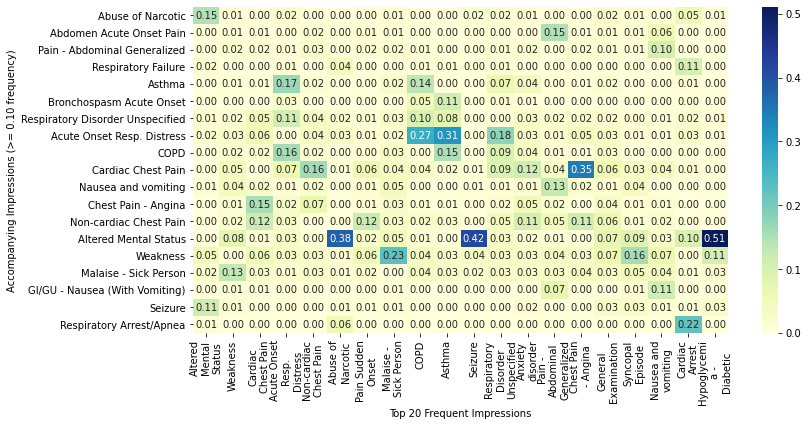

In [20]:
#convert to percent, drop columns
df = freq_impressions_df.T.rename(index={
    'Chest Pain - Cardiac': 'Cardiac Chest Pain', 
    'Respiratory Distress - Acute Onset': 'Acute Onset Resp. Distress', 
    'Pain - Chest Pain (non-cardiac)': 'Non-cardiac Chest Pain',
    'Pain - Not Elsewhere Mentioned Sudden Onset' : 'Pain Sudden Onset',
    'Respiratory - COPD Exacerbation' : 'COPD',
    'Respiratory - Asthma Exacerbation' : 'Asthma',
    'General - Examination no complaint (none)' : 'General Examination'
}).T

df = df.rename(index={
    'Chest Pain - Cardiac': 'Cardiac Chest Pain', 
    'Respiratory Distress - Acute Onset': 'Acute Onset Resp. Distress', 
    'Pain - Chest Pain (non-cardiac)': 'Non-cardiac Chest Pain',
    'Pain - Not Elsewhere Mentioned Sudden Onset' : 'Pain Sudden Onset',
    'Respiratory - COPD Exacerbation' : 'COPD',
    'Respiratory - Asthma Exacerbation' : 'Asthma',
    'General - Examination no complaint (none)' : 'General Examination',
    
    'Respiratory - Bronchospasm Acute Onset': 'Bronchospasm Acute Onset',
    'Cardiac Arrhythmia/Dysrhythmia':'Cardiac Ar/Dysrhythmia',
    'CV - Cardiac Arrest/Obvious Death':'Cardiac Arrest/Obvious Death',
    'Pain - Abdomen Acute Onset':'Abdomen Acute Onset Pain',
    'Respiratory - Arrest/Apnea':'Respiratory Arrest/Apnea'
})

#df = freq_medications_df.drop(index='Oxygen')
#convert table to freq
sums_col = df.sum(axis=0)
print(sums_col) #series
percent_df = df.divide(sums_col)
percent_df = percent_df[(percent_df.T >= 0.10).any()]
print(percent_df.index)
#plot heatmap

fig, ax = plt.subplots(figsize=(12,6)) 

sns.heatmap(percent_df, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_xticklabels([textwrap.fill(e, 11) for e in percent_df.columns])

plt.xlabel("Top 20 Frequent Impressions")
plt.ylabel("Accompanying Impressions (>= 0.10 frequency)")
#Impression >= 0.10
plt.show()

In [9]:
# #clean up dataframe to get top 10 for each
# top_10 = {}

# for icd, impression in impressions_dict.items():
#     top_arr = freq_impressions_df[impression].sort_values(ascending=False).head(10)
#     top_10[impression] = list(top_arr.index)

# top_10

{'Altered Mental Status': ['Abuse of Narcotic',
  'Seizure',
  'Hypoglycemia - Diabetic',
  'Weakness',
  'Abuse of Alcohol - Intoxication',
  'Infectious - Sepsis',
  'Injury - Head',
  'Neuro - Stroke/CVA',
  'Environmental - Poisoning or drug ingestion - Other',
  'Hyperglycemia - Diabetic'],
 'Weakness': ['Malaise - Sick Person',
  'Altered Mental Status',
  'Chest Pain - Cardiac',
  'Syncopal Episode',
  'Nausea and vomiting',
  'Neuro - Stroke/CVA',
  'Pain - Not Elsewhere Mentioned Sudden Onset',
  'Hypotension',
  'Respiratory Distress - Acute Onset',
  'Cardiac Arrhythmia/Dysrhythmia'],
 'Chest Pain - Cardiac': ['Chest Pain - Angina',
  'Pain - Chest Pain (non-cardiac)',
  'Respiratory Distress - Acute Onset',
  'Weakness',
  'Anxiety disorder',
  'Respiratory Disorder Unspecified',
  'Pain - Not Elsewhere Mentioned Sudden Onset',
  'Cardiac Arrhythmia/Dysrhythmia',
  'Malaise - Sick Person',
  'Hypertension'],
 'Respiratory Distress - Acute Onset': ['Respiratory - Asthma Exac

In [10]:
# top_10_freq_impressions = {}

# #make dictionary for top 10
# for impression, dictionary in freq_impressions.items():
#     top_10_freq_impressions[impression] = {}
#     #print(dictionary)
#     for corresp_impression, freq in dictionary.items():
#         if corresp_impression in top_10[impression]: 
#             #print(corresp_impression, freq)
#             top_10_freq_impressions[impression][corresp_impression] = freq

            
# top_10_freq_impressions

{'Altered Mental Status': {'Abuse of Alcohol - Intoxication': 218,
  'Abuse of Narcotic': 889,
  'Seizure': 694,
  'Hyperglycemia - Diabetic': 131,
  'Injury - Head': 176,
  'Hypoglycemia - Diabetic': 489,
  'Environmental - Poisoning or drug ingestion - Other': 146,
  'Neuro - Stroke/CVA': 171,
  'Weakness': 330,
  'Infectious - Sepsis': 182},
 'Weakness': {'Respiratory Distress - Acute Onset': 106,
  'Nausea and vomiting': 162,
  'Cardiac Arrhythmia/Dysrhythmia': 103,
  'Malaise - Sick Person': 554,
  'Pain - Not Elsewhere Mentioned Sudden Onset': 128,
  'Chest Pain - Cardiac': 214,
  'Syncopal Episode': 206,
  'Neuro - Stroke/CVA': 154,
  'Altered Mental Status': 334,
  'Hypotension': 113},
 'Chest Pain - Cardiac': {'Hypertension': 95,
  'Cardiac Arrhythmia/Dysrhythmia': 129,
  'Chest Pain - Angina': 576,
  'Pain - Chest Pain (non-cardiac)': 442,
  'Respiratory Disorder Unspecified': 198,
  'Weakness': 212,
  'Anxiety disorder': 209,
  'Malaise - Sick Person': 97,
  'Pain - Not Else

In [11]:
# #turn into df and graph

# #convert to table

# #columns: x -> Top 10 Impressions rows: y -> Top 20 Corresponding Impressions
# freq_impressions_df_top_10 = pd.DataFrame(0, index=list(set(inner_keys(top_10_freq_impressions))),columns=top_10_freq_impressions.keys())

# for impression, dictionary in top_10_freq_impressions.items():
#     for corresp_imp, freq in dictionary.items():
#         freq_impressions_df_top_10.at[corresp_imp, impression] += freq

# freq_impressions_df_top_10

# #convert table to frequencies
# # total = ct_freqccs_df.to_numpy().sum()

# # ct_freqccs_df = ct_freqccs_df.div(total)

,Altered Mental Status,Weakness,Chest Pain - Cardiac,Respiratory Distress - Acute Onset,Pain - Chest Pain (non-cardiac),Abuse of Narcotic,Pain - Not Elsewhere Mentioned Sudden Onset,Malaise - Sick Person,Respiratory - COPD Exacerbation,Respiratory - Asthma Exacerbation,Seizure,Respiratory Disorder Unspecified,Anxiety disorder,Pain - Abdominal Generalized,Chest Pain - Angina,General - Examination no complaint (none),Syncopal Episode,Nausea and vomiting,Cardiac Arrest,Hypoglycemia - Diabetic
Injury - Shoulder or Upper Arm,0,0,0,0,0,0,70,0,0,0,0,0,0,0,0,0,0,0,0,0
Environmental - Poisoning or drug ingestion - Other,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pain - Abdominal Generalized,0,0,0,0,87,0,0,0,0,0,0,0,0,0,33,0,0,442,0,0
Cardiac Arrhythmia/Dysrhythmia,0,103,129,0,0,0,0,0,0,0,0,0,0,0,0,0,37,0,59,0
Respiratory - Bronchospasm Acute Onset,0,0,0,93,0,0,0,0,110,202,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Abuse of Alcohol - Intoxication,218,0,0,0,0,112,0,0,0,0,41,0,0,0,0,0,0,0,0,0
Abuse of Cocaine,0,0,0,0,0,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chest Pain - Cardiac,0,214,0,223,444,0,135,96,71,0,0,199,209,65,578,61,42,165,0,0
Seizure with Status Epilepticus,0,0,0,0,0,0,0,0,0,0,87,0,0,0,0,0,0,0,0,0


Altered Mental Status                          6076
Weakness                                       4234
Chest Pain - Cardiac                           3752
Respiratory Distress - Acute Onset             3413
Pain - Chest Pain (non-cardiac)                2750
Abuse of Narcotic                              2344
Pain - Not Elsewhere Mentioned Sudden Onset    2203
Malaise - Sick Person                          2449
Respiratory - COPD Exacerbation                2003
Respiratory - Asthma Exacerbation              1826
Seizure                                        1672
Respiratory Disorder Unspecified               2121
Anxiety disorder                               1806
Pain - Abdominal Generalized                   1793
Chest Pain - Angina                            1673
General - Examination no complaint (none)      1015
Syncopal Episode                               1313
Nausea and vomiting                            4238
Cardiac Arrest                                  633
Hypoglycemia

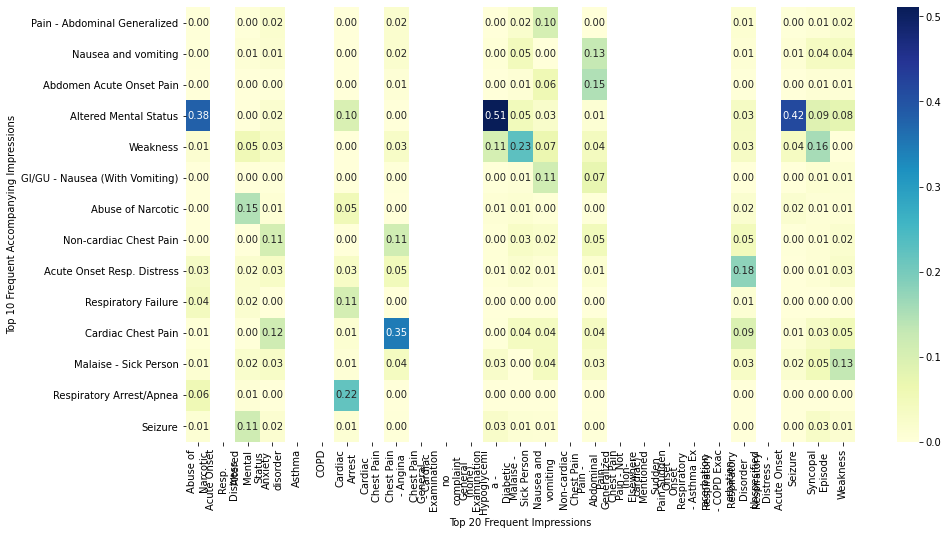

In [13]:
# #convert to percent, drop columns
# df = freq_impressions_df.T.rename(index={
#     'Chest Pain - Cardiac': 'Cardiac Chest Pain', 
#     'Respiratory Distress - Acute Onset': 'Acute Onset Resp. Distress', 
#     'Pain - Chest Pain (non-cardiac)': 'Non-cardiac Chest Pain',
#     'Pain - Not Elsewhere Mentioned Sudden Onset' : 'Pain Sudden Onset',
#     'Respiratory - COPD Exacerbation' : 'COPD',
#     'Respiratory - Asthma Exacerbation' : 'Asthma',
#     'General - Examination no complaint (none)' : 'General Examination'
# }).T

# df = df.rename(index={
#     'Chest Pain - Cardiac': 'Cardiac Chest Pain', 
#     'Respiratory Distress - Acute Onset': 'Acute Onset Resp. Distress', 
#     'Pain - Chest Pain (non-cardiac)': 'Non-cardiac Chest Pain',
#     'Pain - Not Elsewhere Mentioned Sudden Onset' : 'Pain Sudden Onset',
#     'Respiratory - COPD Exacerbation' : 'COPD',
#     'Respiratory - Asthma Exacerbation' : 'Asthma',
#     'General - Examination no complaint (none)' : 'General Examination',
    
#     'Respiratory - Bronchospasm Acute Onset': 'Bronchospasm Acute Onset',
#     'Cardiac Arrhythmia/Dysrhythmia':'Cardiac Ar/Dysrhythmia',
#     'CV - Cardiac Arrest/Obvious Death':'Cardiac Arrest/Obvious Death',
#     'Pain - Abdomen Acute Onset':'Abdomen Acute Onset Pain',
#     'Respiratory - Arrest/Apnea':'Respiratory Arrest/Apnea'
# })

# #df = freq_medications_df.drop(index='Oxygen')
# #convert table to freq
# sums_col = freq_impressions_df.sum(axis=0)
# print(sums_col) #series
# percent_df = df.divide(sums_col)
# percent_df = percent_df[(percent_df.T >= 0.1).any()]
# print(percent_df.index)
# #plot heatmap

# fig, ax = plt.subplots(figsize=(15,8)) 

# sns.heatmap(percent_df, annot=True, fmt=".2f", cmap="YlGnBu")
# ax.set_xticklabels([textwrap.fill(e, 11) for e in percent_df.columns])

# plt.xlabel("Top 20 Frequent Impressions")
# plt.ylabel("Top 10 Frequent Accompanying Impressions")
# #Impression >= 0.1
# plt.show()

In [13]:
#columns: x -> Top 10 Impressions rows: y -> Procedures
freq_procedures_df = pd.DataFrame(0, index=list(set(inner_keys(freq_procedures))),columns=freq_procedures.keys())

for impression, dictionary in freq_procedures.items():
    for corresp_pro, freq in dictionary.items():
        freq_procedures_df.at[corresp_pro, impression] += freq

freq_procedures_df

,Altered Mental Status,Weakness,Chest Pain - Cardiac,Respiratory Distress - Acute Onset,Pain - Chest Pain (non-cardiac),Abuse of Narcotic,Pain - Not Elsewhere Mentioned Sudden Onset,Malaise - Sick Person,Respiratory - COPD Exacerbation,Respiratory - Asthma Exacerbation,Seizure,Respiratory Disorder Unspecified,Anxiety disorder,Pain - Abdominal Generalized,Chest Pain - Angina,General - Examination no complaint (none),Syncopal Episode,Nausea and vomiting,Cardiac Arrest,Hypoglycemia - Diabetic
Cardiac Pacing,8,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,8,1
Clear Airway,157,6,10,61,0,51,3,12,10,3,53,37,6,0,0,17,1,31,278,24
Access Airway,3,0,0,2,0,1,0,1,1,1,0,1,0,0,0,0,0,0,3,0
Patient Cooling/Warming,25,4,1,0,2,0,23,7,0,0,4,0,4,1,0,3,2,5,0,4
Gastric Tube Insertion,7,0,1,1,0,2,0,0,0,0,1,1,0,1,0,5,0,0,67,0
IV/IO,5245,2850,2455,2228,1149,2306,1407,1426,1484,1271,1615,1165,845,1121,913,667,924,2124,1128,1083
CPR,110,0,12,32,0,50,1,7,2,2,9,20,4,0,0,64,4,4,1317,2
CPAP/BiPAP,33,21,17,425,5,3,1,18,366,200,3,143,20,5,1,21,0,4,6,0
Restraint Applied,208,2,2,12,0,127,2,5,3,2,57,6,11,0,1,3,5,3,1,7
Intubation,581,11,13,93,0,681,2,18,11,8,78,43,7,0,0,33,13,13,1224,30


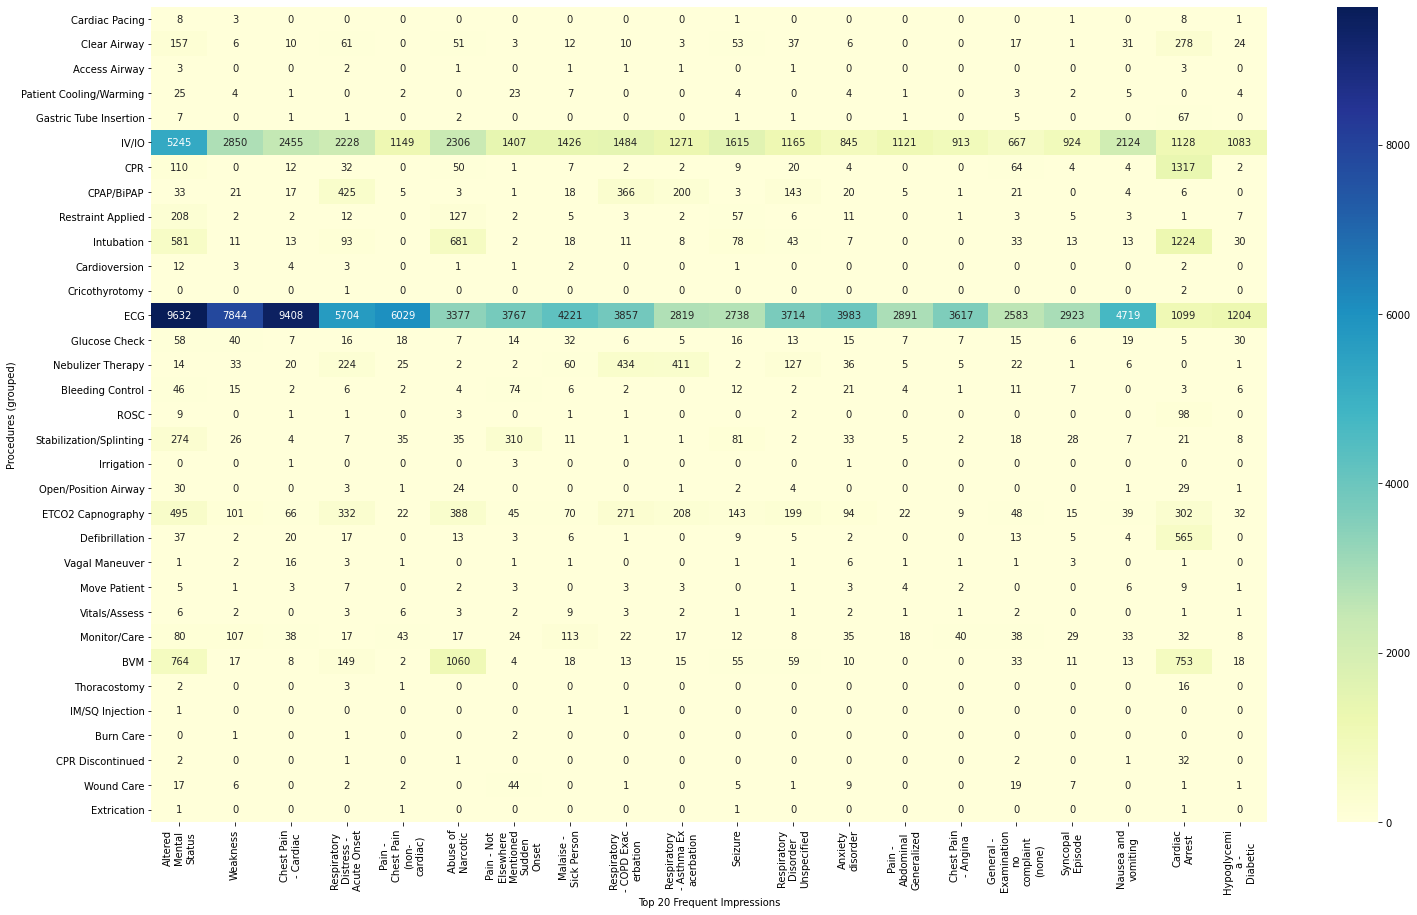

In [14]:
#plot heatmap

fig, ax = plt.subplots(figsize=(25,15)) 

sns.heatmap(freq_procedures_df, annot=True, fmt="g", cmap="YlGnBu")
ax.set_xticklabels([textwrap.fill(e, 11) for e in freq_procedures_df.columns])

plt.xlabel("Top 20 Frequent Impressions")
plt.ylabel("Procedures (grouped)")
plt.show()

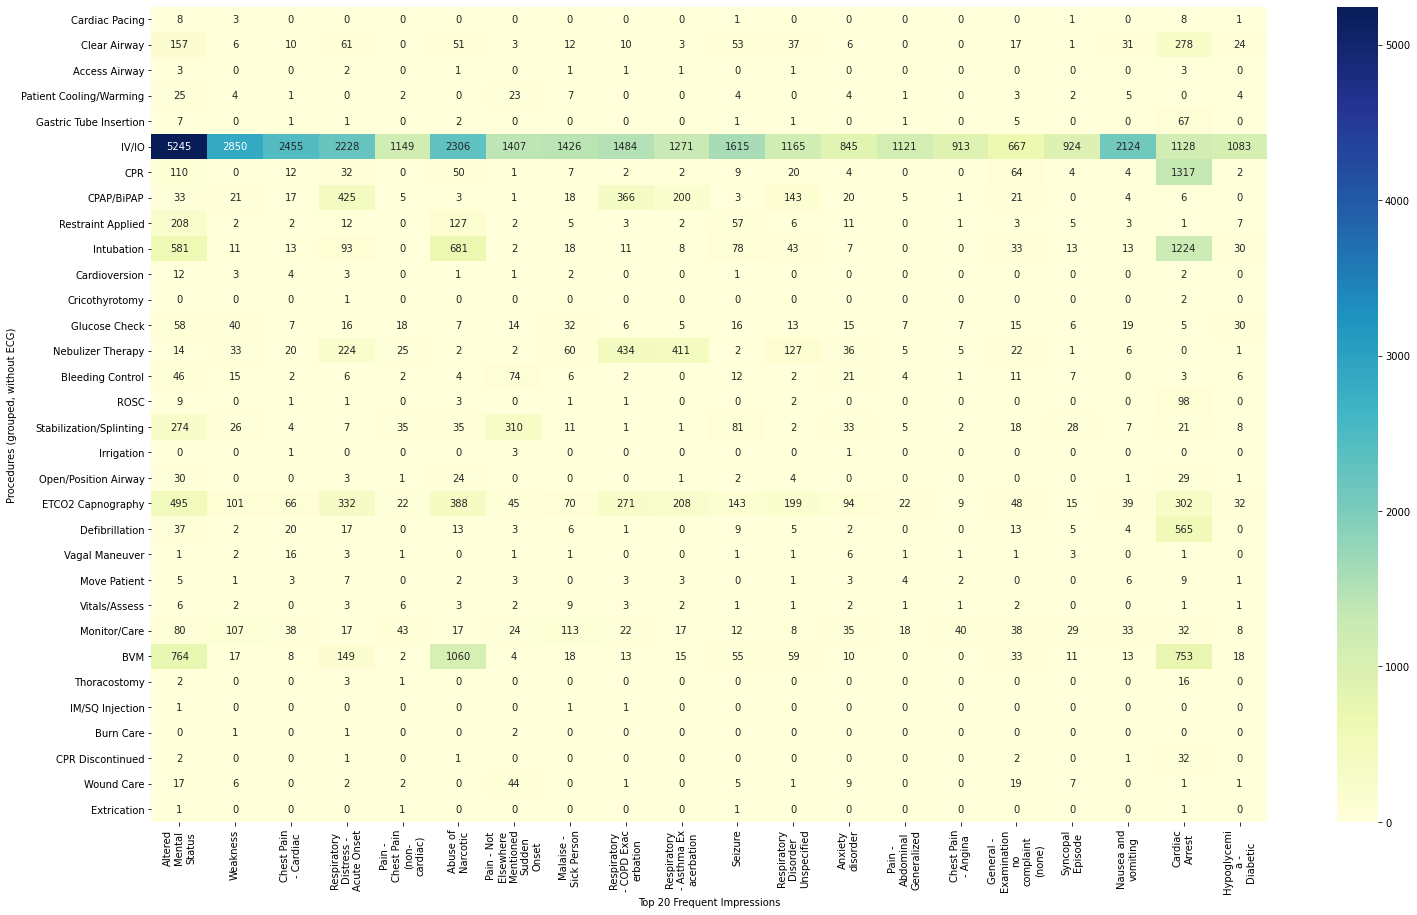

In [15]:
''' ECG Removed 
'''

no_ecg = freq_procedures_df.drop(index='ECG')

fig, ax = plt.subplots(figsize=(25,15)) 

sns.heatmap(no_ecg, annot=True, fmt="g", cmap="YlGnBu")
ax.set_xticklabels([textwrap.fill(e, 11) for e in no_ecg.columns])

plt.xlabel("Top 20 Frequent Impressions")
plt.ylabel("Procedures (grouped, without ECG)")
plt.show()

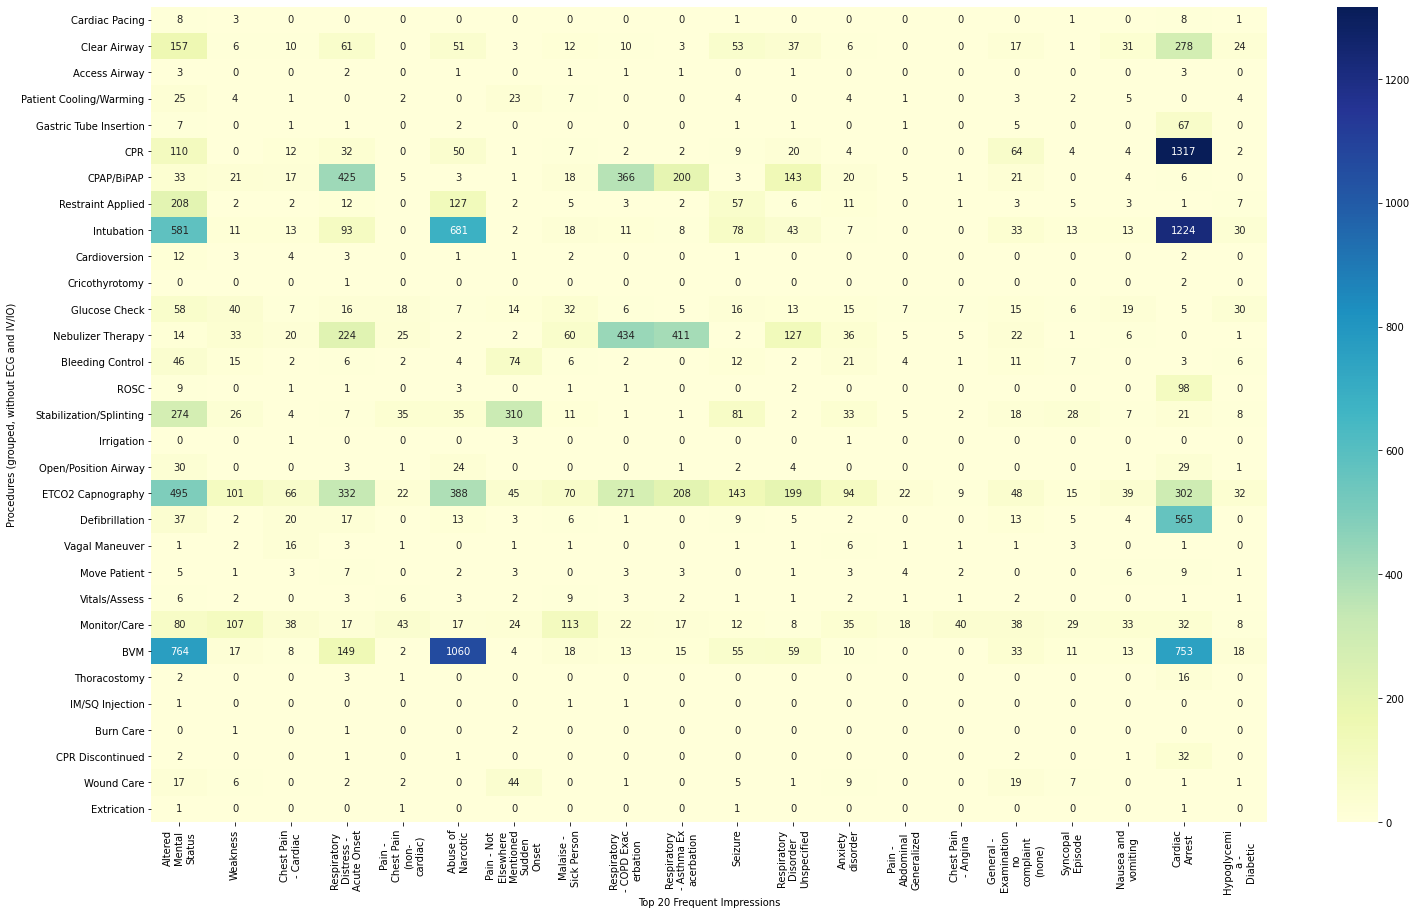

In [16]:
''' IV/IO AND ECG Removed 
'''

no_iv_ecg = freq_procedures_df.drop(index='ECG').drop(index='IV/IO')

fig, ax = plt.subplots(figsize=(25,15)) 

sns.heatmap(no_iv_ecg, annot=True, fmt="g", cmap="YlGnBu")
ax.set_xticklabels([textwrap.fill(e, 11) for e in no_iv_ecg.columns])

plt.xlabel("Top 20 Frequent Impressions")
plt.ylabel("Procedures (grouped, without ECG and IV/IO)")
plt.show()

Altered Mental Status                 2400
Weakness                               192
Cardiac Chest Pain                     139
Respiratory Distress - Acute Onset    1063
Non-cardiac Chest Pain                  95
Abuse of Narcotic                     2065
Pain Sudden Onset                      490
Malaise - Sick Person                  206
COPD                                   853
Asthma                                 649
Seizure                                391
Respiratory Disorder Unspecified       467
Anxiety disorder                       185
Pain - Abdominal Generalized            29
Chest Pain - Angina                     18
General Examination                    280
Syncopal Episode                        94
Nausea and vomiting                    111
Cardiac Arrest                        4433
Hypoglycemia - Diabetic                133
dtype: int64


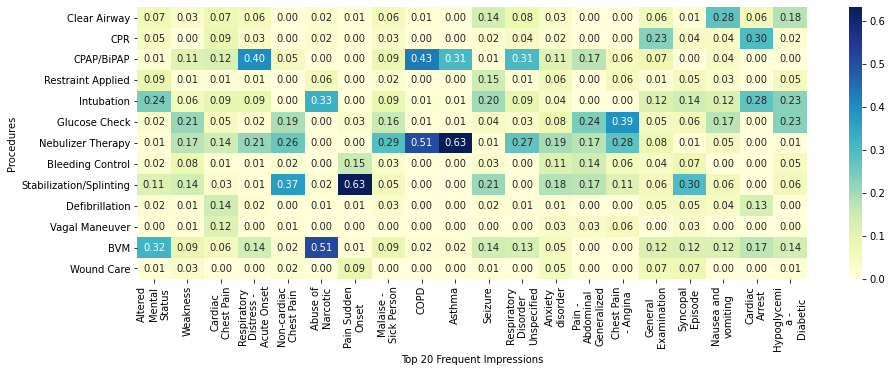

In [17]:
#convert to percent, drop columns

df = freq_procedures_df.drop(index='ECG').drop(index='IV/IO').drop(index='Vitals/Assess').drop(index='Monitor/Care').drop(index='Move Patient').drop(index='ETCO2 Capnography')

df = df.T.rename(index={
    'Chest Pain - Cardiac': "Cardiac Chest Pain", 
    'Respiratory Distress - Acute Onset ': "Acute Onset Resp. Distress", 
    'Pain - Chest Pain (non-cardiac)': "Non-cardiac Chest Pain",
    'Pain - Not Elsewhere Mentioned Sudden Onset' : 'Pain Sudden Onset',
    'Respiratory - COPD Exacerbation' : 'COPD',
    'Respiratory - Asthma Exacerbation' : 'Asthma',
    'General - Examination no complaint (none)' : 'General Examination',
}).T
#convert table to freq
sums_col = df.sum(axis=0)
print(sums_col) #series

percent_pro_df = df.divide(sums_col)
percent_pro_df = percent_pro_df[(percent_pro_df.T >= 0.05).any()]

#plot heatmap

fig, ax = plt.subplots(figsize=(15,5)) 

sns.heatmap(percent_pro_df, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_xticklabels([textwrap.fill(e, 11) for e in percent_pro_df.columns])

plt.xlabel("Top 20 Frequent Impressions")
plt.ylabel("Procedures")
#Procedures >= 0.05 (grouped, without EGC, IV/IO, Vitals/Assess, Monitor/Care, ETCO2 Capnography, and Move Patient)
plt.show()

Altered Mental Status               5821
Weakness                            2431
Cardiac Chest Pain                  3737
Acute Onset Resp. Distress          6271
Non-cardiac Chest Pain              1707
Abuse of Narcotic                   4346
Pain Sudden Onset                   1235
Malaise - Sick Person               1539
COPD                                5676
Asthma                              5524
Seizure                             1395
Respiratory Disorder Unspecified    2977
Anxiety disorder                    1138
Pain - Abdominal Generalized        1042
Chest Pain - Angina                 1305
General Examination                  687
Syncopal Episode                     602
Nausea and vomiting                 2075
Cardiac Arrest                      4324
Hypoglycemia - Diabetic             1465
dtype: int64


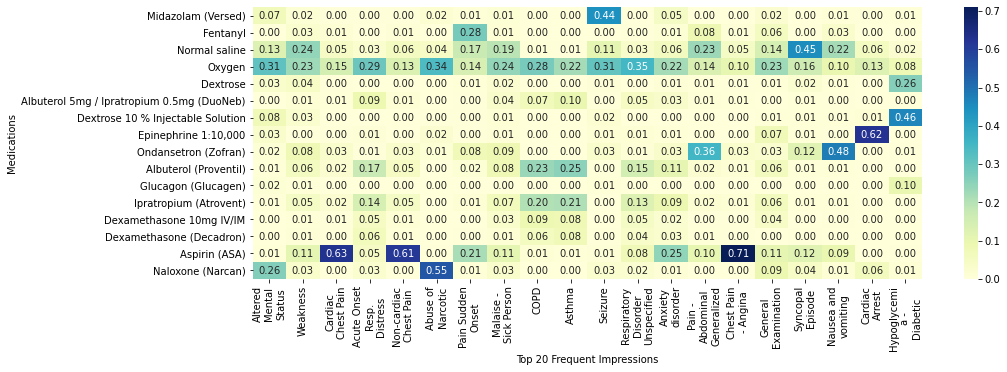

In [18]:
#columns: x -> Top 10 Impressions rows: y -> Medications
freq_medications_df = pd.DataFrame(0, index=list(set(inner_keys(freq_medications))),columns=freq_medications.keys())

for impression, dictionary in freq_medications.items():
    for corresp_med, freq in dictionary.items():
        freq_medications_df.at[corresp_med, impression] += freq

freq_medications_df

#convert to percent, drop columns
df = freq_medications_df.T.rename(index={
    'Chest Pain - Cardiac': 'Cardiac Chest Pain', 
    'Respiratory Distress - Acute Onset': 'Acute Onset Resp. Distress', 
    'Pain - Chest Pain (non-cardiac)': 'Non-cardiac Chest Pain',
    'Pain - Not Elsewhere Mentioned Sudden Onset' : 'Pain Sudden Onset',
    'Respiratory - COPD Exacerbation' : 'COPD',
    'Respiratory - Asthma Exacerbation' : 'Asthma',
    'General - Examination no complaint (none)' : 'General Examination'
}).T

#df = freq_medications_df.drop(index='Oxygen')
#convert table to freq
sums_col = df.sum(axis=0)
print(sums_col) #series

percent_df = df.divide(sums_col)
percent_df = percent_df[(percent_df.T >= 0.05).any()]


#plot heatmap

fig, ax = plt.subplots(figsize=(15,5)) 

sns.heatmap(percent_df, annot=True, fmt='.2f', cmap='YlGnBu')
ax.set_xticklabels([textwrap.fill(e, 11) for e in percent_df.columns])

plt.xlabel('Top 20 Frequent Impressions')
plt.ylabel('Medications')
#Medications >= 0.05
plt.show()

In [19]:
# #write out dictionaries to excel

# for i in range(len(impressions_name)):
#     writer = int_writer = pd.ExcelWriter( 'RQ1 ' + impressions_name[i] +' Correlation Frequency.xlsx', engine='xlsxwriter')
    
#     imp = pd.DataFrame.from_dict(freq_impressions[i], orient='index')
#     impression_text = []
#     for each in imp.index.values:
#         impression_text.append(imp_dict[each][0])
#     imp['Impression'] = impression_text
    
#     pro = pd.DataFrame.from_dict(freq_procedures[i], orient='index')
#     procedure_text = []
#     for each in pro.index.values:
#         procedure_text.append(pro_dict[int(each)][0])
#     pro['Procedure'] = procedure_text
    
#     med = pd.DataFrame.from_dict(freq_medications[i], orient='index')
#     medication_text = []
#     for each in med.index.values:
#         try:
#             medication_text.append(med_dict[each][0])
#         except KeyError:
#             medication_text.append(med_dict[int(each)][0])
#     med['Medication'] = medication_text
    
#     imp.to_excel(writer, sheet_name='Other Impressions')
#     pro.to_excel(writer, sheet_name='Procedures')
#     med.to_excel(writer, sheet_name='Medications')
    
#     writer.save()